# Выборочные статистики и центральная предельная теорема

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['savefig.dpi'] = 150
plt.rcParams['figure.dpi'] = 150

## Подготовка данных

И снова здравствуйте, Малые Кармакулы

In [9]:
df = pd.read_csv('EDA_demo_data/karmakuly_processed.csv', parse_dates=['Date'], index_col='Date')

# Все данные
#data2stat = df['wvel'].dropna() 

# Выберем только 100 случайных элементов
data2stat = df['wvel'].dropna().sample(100, random_state=42)

## Вспомним как выглядит распределение скорости ветра по полной выборке данных

<Axes: ylabel='Frequency'>

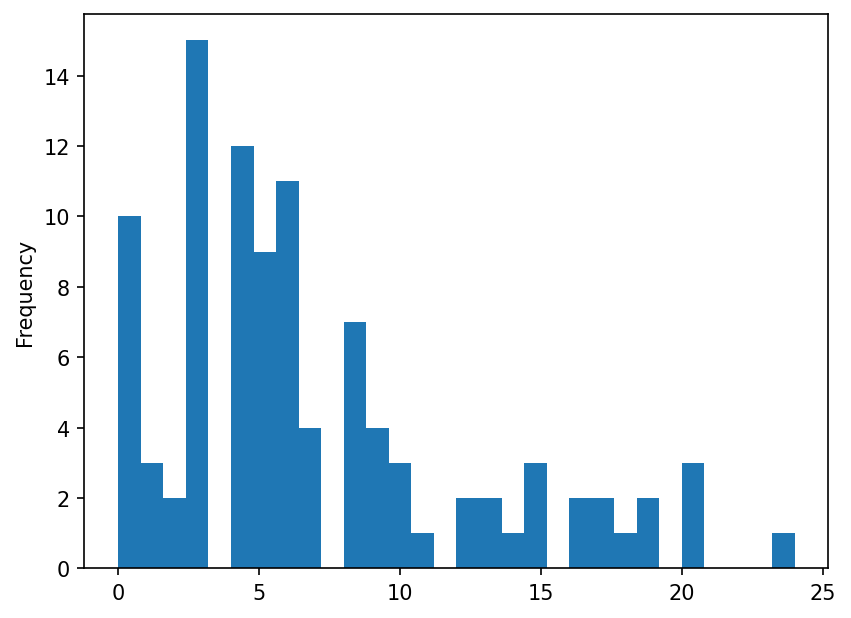

In [10]:
data2stat.plot.hist(bins=30)

## Применим bootstrap для формирования выборок и анализа выборочных средних

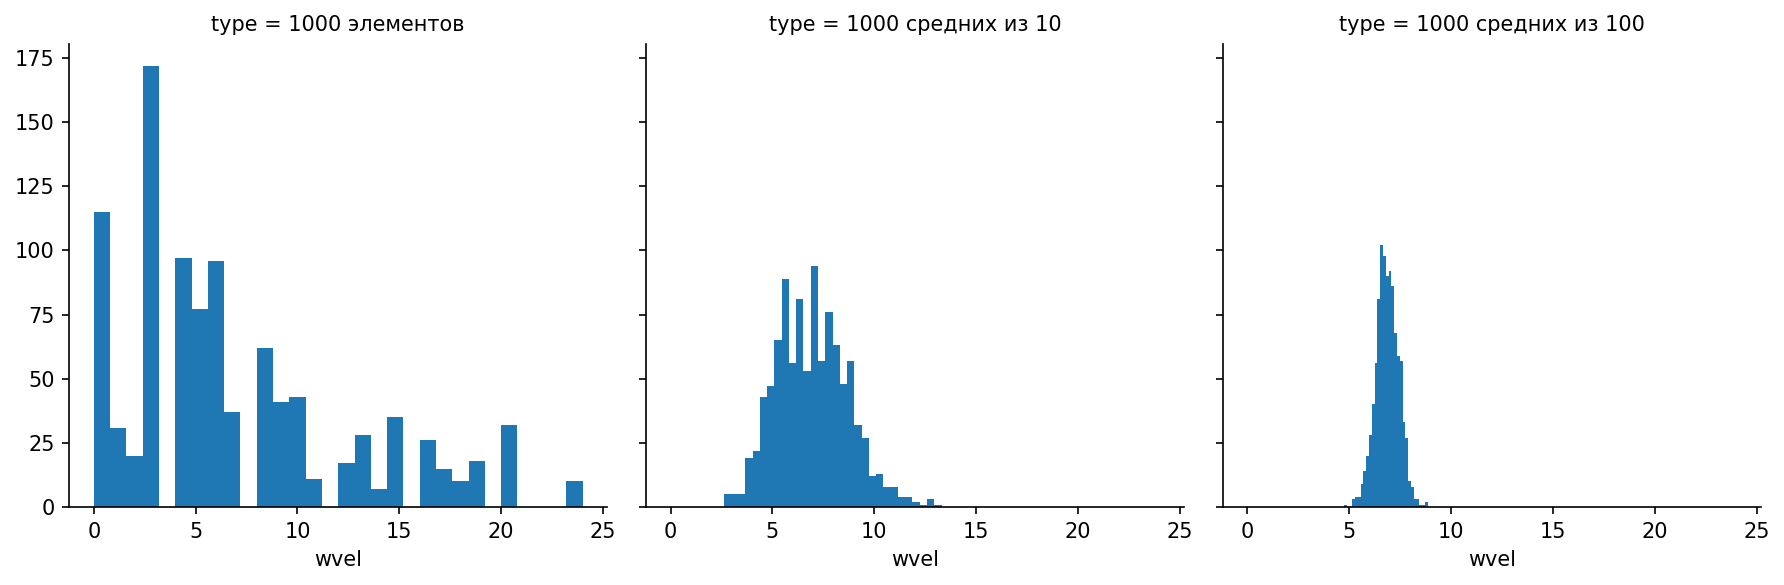

In [12]:
n = 1000

subsample_sizes = [10, 100]
#subsample_sizes = [5, 50]

sample_data = pd.DataFrame({'wvel':data2stat.sample(n, replace=True, random_state=42),
                            'type':'%d элементов'%n})
results = [sample_data]

for sn in subsample_sizes:
    results.append(pd.DataFrame({'wvel':[data2stat.sample(sn, replace=True).mean() for _ in range (n)],
                                  'type':'%d средних из %d'%(n, sn)}))

results = pd.concat (results)                              

g = sns.FacetGrid (results, col = 'type', height = 4, aspect = 1)
g.map (plt.hist, 'wvel', bins=30)